In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

2023-01-05 11:13:30.832833: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 11:13:31.213614: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-05 11:13:31.213637: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-05 11:13:32.271029: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
df=pd.read_csv('ferdata.csv')
df['image'][0]

'59 71 89 118 139 160 183 222 212 148 77 16 16 13 10 11 10 7 4 4 1 3 2 0 1 1 0 0 0 1 0 1 1 0 2 16 18 4 8 22 25 24 18 19 29 29 42 65 64 76 85 105 127 150 168 203 163 106 51 12 16 8 7 12 13 6 3 2 2 3 2 0 1 1 0 0 1 3 3 0 0 0 2 6 18 13 3 14 22 19 22 26 26 28 34 54 67 81 89 102 123 139 146 173 141 79 22 13 9 7 8 12 8 3 3 5 4 1 1 0 0 0 0 0 3 4 5 2 0 0 1 4 19 15 3 11 18 32 17 10 28 28 31 48 62 78 86 95 116 131 148 152 94 29 10 10 6 9 10 9 5 3 7 6 2 0 1 2 1 3 1 1 1 3 1 1 1 1 4 9 11 11 6 3 10 19 22 6 22 49 29 40 52 67 76 87 109 128 134 105 43 14 10 6 9 10 7 8 3 8 7 0 0 1 1 0 2 3 1 0 0 0 0 0 0 0 2 5 9 13 5 6 7 9 8 5 5 27 48 44 41 54 64 77 105 121 118 78 22 12 6 11 15 8 10 6 8 10 1 0 1 1 1 1 2 0 0 0 0 0 0 3 5 2 0 1 6 15 6 2 12 15 7 3 4 4 26 47 32 43 58 71 99 109 89 45 14 5 8 14 10 9 8 7 8 5 1 0 2 3 4 4 1 0 0 0 0 0 1 1 6 5 3 0 3 14 9 1 6 13 6 3 5 5 18 37 26 36 53 71 92 87 78 28 4 8 13 11 8 8 10 9 5 4 0 1 3 4 4 2 0 0 0 0 1 2 3 3 2 3 0 1 6 17 12 2 8 14 2 0 9 11 16 33 22 32 54 71 84 91 61 12 6 9 11 9

In [5]:
X=[]
y=[]

In [7]:
for index,row in df.iterrows():
    val=row['image'].split(" ")
    try:
        X.append(np.array(val,'float32'))
        y.append(np.array(row['label']))
    except:
        print(f"error occured at index :{index} and row:{row}")

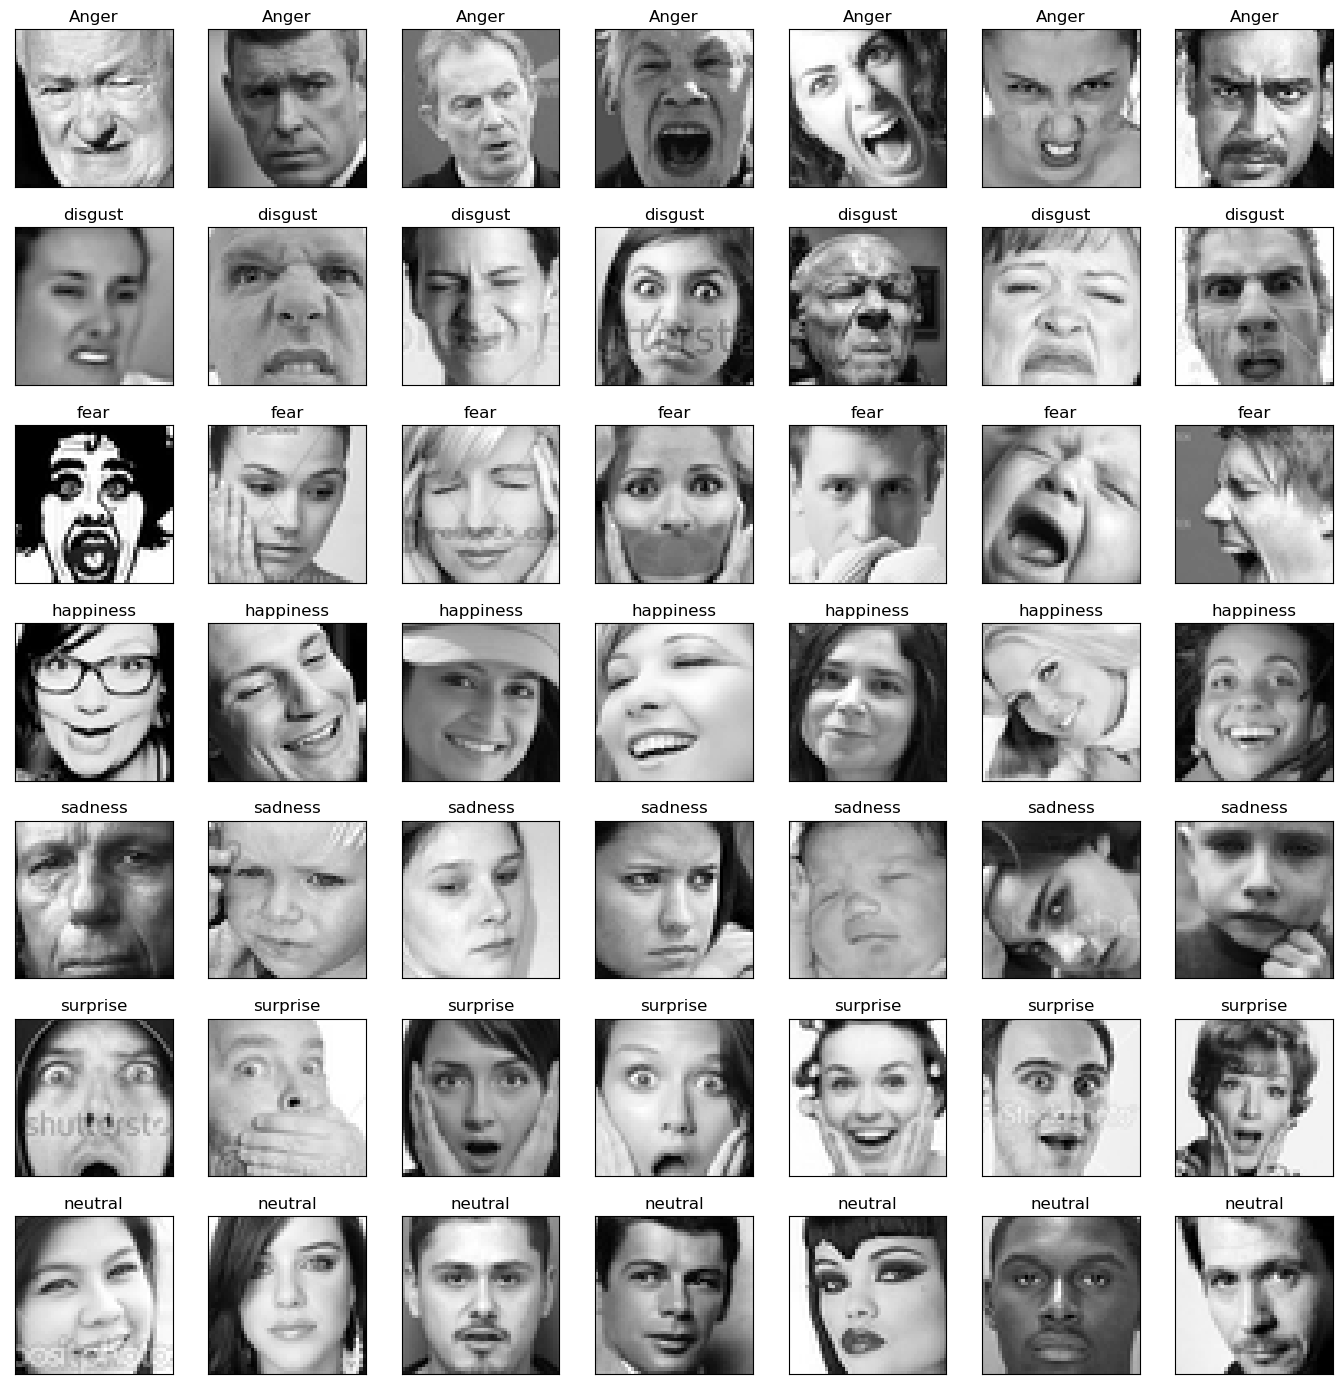

In [8]:
emotion_label_to_text={0:'Anger',1:'disgust',2:'fear',3:'happiness',4:'sadness',5:'surprise',6:'neutral'}
fig=plt.figure(1,(14,14))
k=0
for label in sorted(df.label.unique()):
    for j in range(7):
        px=df[df.label==label].image.iloc[k]
        px=np.array(px.split(' ')).reshape(48,48).astype('float32')
        
        k+=1
        ax=plt.subplot(7,7,k)
        ax.imshow(px,cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
num_features=64
num_labels=7
batch_size=64
epochs=50
width,height=48,48

In [12]:
X_train=np.array(X_train,'float32')
y_train=np.array(y_train,'float32')
X_test=np.array(X_test,'float32')
y_test=np.array(y_test,'float32')

y_train=np_utils.to_categorical(y_train,num_classes=num_labels)
y_test=np_utils.to_categorical(y_test,num_classes=num_labels)

In [13]:
X_train -= np.mean(X_train,axis=0)
X_train /=np.std(X_train,axis=0)

X_test -= np.mean(X_test,axis=0)
X_test /=np.std(X_test,axis=0)

X_train =X_train.reshape(X_train.shape[0],48,48,1)
X_test=X_test.reshape(X_test.shape[0],48,48,1)

In [17]:
#1st convolutional layer
model=Sequential()
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(X_train.shape[1:])))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

#2nd convolutional layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

#3rd convolutional layer
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

#Fully connected neural networks
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels,activation='softmax'))

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       1280      
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 44, 128)       147584    
                                                                 
 batch_normalization_3 (Batc  (None, 44, 44, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 22, 22, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 64)       

In [19]:
#compile the  model
model.compile(loss=categorical_crossentropy,
             optimizer=Adam(),
             metrics=['accuracy'])

In [ ]:
#Training the model
cnn=model.fit(X_train,y_train,
             batch_size=batch_size,
             epochs=epochs,
             verbose=1,
             validation_data=(X_test,y_test),
             shuffle=True)
                                 

Epoch 1/150


2023-01-05 11:53:02.752986: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 264545280 exceeds 10% of free system memory.
2023-01-05 11:53:04.282409: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 69337088 exceeds 10% of free system memory.
2023-01-05 11:53:04.353938: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 63438848 exceeds 10% of free system memory.
2023-01-05 11:53:04.712790: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 63438848 exceeds 10% of free system memory.
2023-01-05 11:53:05.119382: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31719424 exceeds 10% of free system memory.


449/449 [==============================] - 722s 2s/step - loss: 1.8725 - accuracy: 0.2447 - val_loss: 1.6888 - val_accuracy: 0.3446
Epoch 2/150
449/449 [==============================] - ETA: 0s - loss: 1.6146 - accuracy: 0.3714

In [ ]:
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='best')
plt.show()

In [ ]:
#Saving the model to use it later on
fer_json=model.to_json()
with open('model.json','w') as json_file:
    json_file.write(fer_json)
model.save_weights('model.h5')

In [ ]:
#loading json and creating model
from keras.models import model_from_json
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
#load wights into new model
loaded_model.load_weights('./model.h5')
print('loaded model from disk')

In [ ]:
#evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
score=loaded_model.evaluate(X_test,y_test,verbose=0)
print("%s: %.2f%%"%(loaded_model.metrics_names[1],score[1]*100))